In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import VGG19,ResNet50

In [2]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

In [3]:
train_x = train_x.astype(np.float32) / 255.0
test_x = test_x.astype(np.float32) / 255.0

In [4]:
gen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [5]:
augment_ratio = 1.5
augment_size = int(augment_ratio * train_x.shape[0])

In [6]:
randIdx = np.random.randint(train_x.shape[0], size=augment_size)

In [7]:
augmented_x = train_x[randIdx].copy()
augmented_y = train_y[randIdx].copy()

In [8]:
augmented_x, augmented_y = gen.flow(
    augmented_x, 
    augmented_y,
    batch_size=augment_size,
    shuffle=False
).next()

In [9]:
train_x = np.concatenate((train_x, augmented_x))
train_y = np.concatenate((train_y, augmented_y))

In [10]:
s = np.arange(train_x.shape[0])
np.random.shuffle(s)

In [11]:
train_x = train_x[s]
train_y = train_y[s]

In [12]:
def CreateModel():
    baseModel = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=train_y.shape[1])
    
    model= Sequential()
    model.add(baseModel)
    model.add(Flatten())
    
    model.add(Dense(1024,activation=('relu'),input_dim=512))
    model.add(Dense(512,activation=('relu'))) 
    model.add(Dense(256,activation=('relu'))) 
    model.add(Dense(128,activation=('relu')))
    model.add(Dense(10,activation=('softmax'))) #This is the classification layer
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

In [13]:
model = CreateModel()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [14]:
history = model.fit(train_x, train_y, batch_size=256, epochs=30, validation_data=(test_x, test_y))

Epoch 1/30
489/489 [==============================] - 27s 46ms/step - loss: 1.8492 - accuracy: 0.2597 - val_loss: 1.5182 - val_accuracy: 0.3706
Epoch 2/30
489/489 [==============================] - 22s 44ms/step - loss: 1.4607 - accuracy: 0.4379 - val_loss: 1.2586 - val_accuracy: 0.5555
Epoch 3/30
489/489 [==============================] - 22s 45ms/step - loss: 1.2601 - accuracy: 0.5513 - val_loss: 1.1429 - val_accuracy: 0.6094
Epoch 4/30
489/489 [==============================] - 22s 45ms/step - loss: 1.0080 - accuracy: 0.6489 - val_loss: 0.9026 - val_accuracy: 0.6881
Epoch 5/30
489/489 [==============================] - 22s 46ms/step - loss: 0.8756 - accuracy: 0.7056 - val_loss: 0.9801 - val_accuracy: 0.6982
Epoch 6/30
489/489 [==============================] - 22s 46ms/step - loss: 0.7563 - accuracy: 0.7512 - val_loss: 0.7850 - val_accuracy: 0.7516
Epoch 7/30
489/489 [==============================] - 22s 46ms/step - loss: 0.7025 - accuracy: 0.7707 - val_loss: 0.7165 - val_accuracy:

### 83.20 %

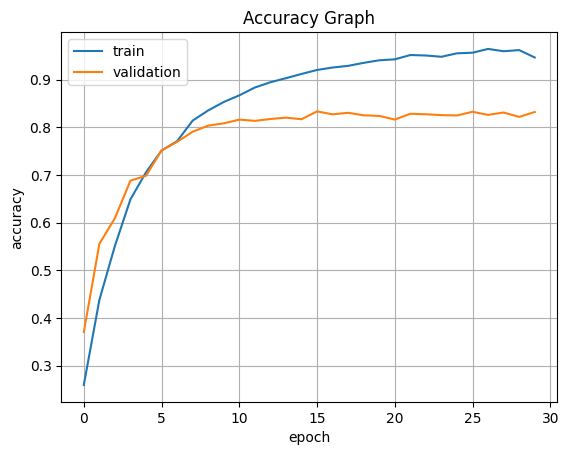

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

In [16]:
model.save('83_20.model')

INFO:tensorflow:Assets written to: 83_20.model\assets


INFO:tensorflow:Assets written to: 83_20.model\assets
